# ANalysis Of VAriance (One-Way ANOVA)

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math as mt
import seaborn as sns
import statistics as st
import pylab
import sklearn as sk
import matplotlib as mpl
import statsmodels.stats.weightstats as wstats
from scipy.stats import sem
from math import sqrt 
from scipy.stats import norm
from sklearn import preprocessing
from statsmodels.stats.weightstats import ztest

In [2]:
print('You have randomly assigned employees to one of four experimental conditions:\n(Condition A, Condition B, Condition C, and Condition D) to see if they produce different effects.\n\nSpecifically, you want to know if Days is different due to Experimental Condition.') 

You have randomly assigned employees to one of four experimental conditions:
(Condition A, Condition B, Condition C, and Condition D) to see if they produce different effects.

Specifically, you want to know if Days is different due to Experimental Condition.


In [3]:
# load data file
df = pd.read_csv("ANOVA.txt", sep="\t")

# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])

# replace column names
df_melt.columns = ['Index', 'Conditions', 'Value']
np.round(df.describe(),2)

,A,B,C,D
count,50.00,50.00,50.00,50.00
mean,25.36,25.64,26.12,27.74
std,4.94,4.33,5.24,5.63
min,17.00,14.00,14.00,16.00
25%,21.00,23.00,23.00,24.00
50%,26.00,26.00,25.50,28.00
75%,28.75,28.75,30.00,32.00
max,38.00,34.00,36.00,40.00


In [4]:
alpha=0.05
list1=np.array(df['A'])
list2=np.array(df['B'])
list3=np.array(df['C'])
list4=np.array(df['D'])

list=[*list1,*list2,*list3,*list4]
list=np.array(list)
n1=len(list1)

ser1 = pd.Series(list1)
list1 = ser1.tolist()
ser2 = pd.Series(list2)
list2 = ser2.tolist()
ser3 = pd.Series(list3)
list3 = ser3.tolist()
ser4 = pd.Series(list4)
list4 = ser4.tolist()


In [5]:
import scipy.stats as stats


# get ANOVA table
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('Value ~ Conditions', data=df_melt).fit()

anova_table = sm.stats.anova_lm(model, typ=2)
anova_table
# output (ANOVA F and p value)

# ANOVA table 
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df_melt, res_var='Value', anova_model='Value ~ Conditions')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
Conditions,3.0,169.815,56.605000,2.214514,0.087711
Residual,196.0,5009.940,25.560918,NaN,NaN


## Test Hypothesis

In [6]:
print("Test Hypothesis")
print('===============================================================================================================================')
print("Q: Are there differences in Days by Experimental Condition?")
print('H0: μ1 = μ2 = μ3 = μ4')
print("H1: At least two means differ")
print('===============================================================================================================================')

# output (ANOVA F and p value)
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'])
print("F-Statistic = ""%.3f" %  fvalue,"\np-value = ""%.6f" % pvalue)
print('===============================================================================================================================')
print("-----------------------------------------")
print(": Results :")
if(pvalue < alpha ):
    print("-----------------------------------------")
    print()
    print("Reject the null hypothesis")
    print("Accept the alternative.") 
    print("The ratio is statistically significant") 
    print("At least two Experimental Conditions differ")
    print()  
    print("-----------------------------------------")
else:
    print("-----------------------------------------")
    print("Retmain the null.") 
    print("The difference is not statistically significant.") 
    print("There is no difference on Days by Experimental Condition.") 
    print("-----------------------------------------")
    print("-----------------------------------------")

Test Hypothesis
Q: Are there differences in Days by Experimental Condition?
H0: μ1 = μ2 = μ3 = μ4
H1: At least two means differ
F-Statistic = 2.215 
p-value = 0.087711
-----------------------------------------
: Results :
-----------------------------------------
Retmain the null.
The difference is not statistically significant.
There is no difference on Days by Experimental Condition.
-----------------------------------------
-----------------------------------------


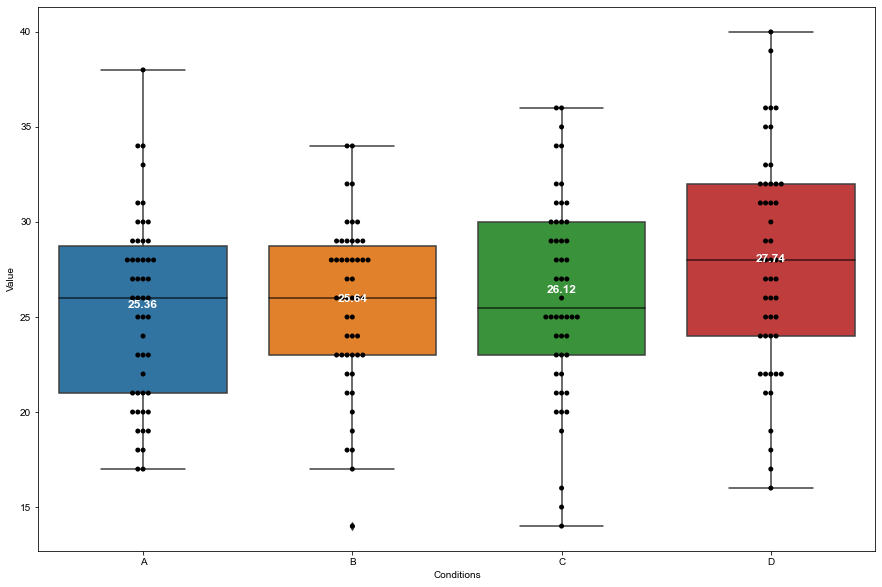

In [7]:
# generate a boxplot to see the data distribution by treatments. 
#Using boxplot, we can easily detect the differences between different treatments

import seaborn as sns
fig, ax = plt.subplots(figsize=(15,10)) #Setting size of the canvas

sns.set_style("whitegrid")
box_plot = sns.boxplot(x="Conditions",y="Value",data=df_melt,medianprops=dict(color="k", alpha=0.7))
ax = sns.swarmplot(x="Conditions", y="Value", data=df_melt, color='k')

#printing the median value at the center of every category
means = df_melt.groupby(['Conditions'])['Value'].mean()
vertical_offset = df_melt['Value'].median() * 0.005 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,means[xtick] + vertical_offset,means[xtick], 
            horizontalalignment='center',size='large',color='w',weight='semibold')

plt.show()

In [8]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#create DataFrame to hold data
dr = pd.DataFrame({'score': list,
                   'group': np.repeat(['A','B','C','D'], repeats=n1)}) 

# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=dr['score'],
                          groups=dr['group'],
                          alpha=alpha)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B     0.28 0.9926 -2.3401 2.9001  False
     A      C     0.76 0.8759 -1.8601 3.3801  False
     A      D     2.38 0.0897 -0.2401 5.0001  False
     B      C     0.48 0.9646 -2.1401 3.1001  False
     B      D      2.1 0.1643 -0.5201 4.7201  False
     C      D     1.62 0.3798 -1.0001 4.2401  False
---------------------------------------------------


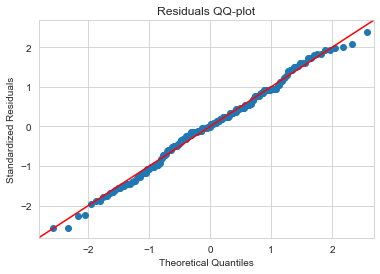

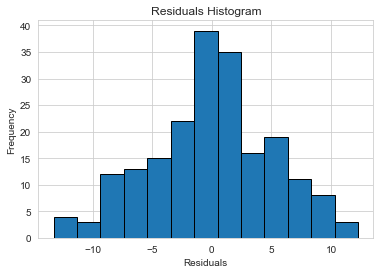

In [37]:
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt

# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.title("Residuals QQ-plot")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()


# histogram
#fig, ax = plt.subplots(figsize=(15,10)) #Setting size of the canvas
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.title("Residuals Histogram")
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [10]:
#Shapiro-Wilk test
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print('===============================================================================================================================')
print("Shapiro-Wilk test\n\nH0: The data is drawn from normal distribution.")
print("H1: The data is NOT drawn from normal distribution.\n")

print('===============================================================================================================================')
print("W-Statistic = ""%.3f" % w,"\np-value = ""%.4f" % pvalue)
print('===============================================================================================================================')
print("-----------------------------------------")
print(": Results :")
if(pvalue < alpha ):
    print("-----------------------------------------")
    print()
    print("Reject the null hypothesis")
    print("Accept the alternative.") 
    print("The data is drawn from normal distribution.") 
    print()  
    print("-----------------------------------------")
    print("|\n|\n|\n|\n|\n|\n|\nv\n")
    #Levene’s test 
    
    from bioinfokit.analys import stat 
    res = stat()
    res.levene(df=df_melt, res_var='Value', xfac_var='Conditions')
    print('===============================================================================================================================')
    print("Levene’s test \n\nH0: The samples from populations have equal variances.")
    print("H1: The samples from populations have NOT equal variances.")
    print('===============================================================================================================================')
    res.levene_summary
    
else:
    print("-----------------------------------------")
    print("Retain the null.") 
    print("The data is drawn from normal distribution.") 
    print("-----------------------------------------")
    print("-----------------------------------------\n")
    print('===============================================================================================================================')

    print("\nHomogeneity of Variances\n")

    #Homogeneity of Variances

    import scipy.stats as stats
    w, pvalue = stats.bartlett(df['A'], df['B'], df['C'], df['D'])

    print('===============================================================================================================================')
    print("Bartlett’s test test\n\nH0: The samples from populations have equal variances.")
    print("H1: The samples from populations have NOT equal variances.\n")

    print('===============================================================================================================================')
    print("B-Statistic = ""%.3f" % w,"\np-value = ""%.4f" % pvalue)
    print('===============================================================================================================================')
    print("-----------------------------------------")
    print(": Results :")
    if(pvalue < alpha ):
        print("-----------------------------------------")
        print()
        print("Reject the null hypothesis")
        print("Accept the alternative.") 
        print("The samples from populations have NOT equal variances.") 
        print()  
        print("-----------------------------------------")
    else:
        print("-----------------------------------------")
        print("Retain the null.") 
        print("The samples from populations have equal variances.") 
        print("-----------------------------------------")
        print("-----------------------------------------")

    from bioinfokit.analys import stat 
    res = stat()
    res.bartlett(df=df_melt, res_var='Value', xfac_var='Conditions')
    res.bartlett_summary

Shapiro-Wilk test

H0: The data is drawn from normal distribution.
H1: The data is NOT drawn from normal distribution.

W-Statistic = 0.993 
p-value = 0.4339
-----------------------------------------
: Results :
-----------------------------------------
Retain the null.
The data is drawn from normal distribution.
-----------------------------------------
-----------------------------------------


Homogeneity of Variances

Bartlett’s test test

H0: The samples from populations have equal variances.
H1: The samples from populations have NOT equal variances.

B-Statistic = 3.523 
p-value = 0.3178
-----------------------------------------
: Results :
-----------------------------------------
Retain the null.
The samples from populations have equal variances.
-----------------------------------------
-----------------------------------------
